In [1]:
import os, sys
sys.path.append('../../')
import neurons

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
cmap = 'viridis'

spec_norm = Normalize(0, 1)
spec_mapp = ScalarMappable(cmap=cmap, norm=spec_norm)

spike_norm = Normalize(-100, 50)
spike_mapp = ScalarMappable(cmap=cmap, norm=spike_norm)

# Load Data

In [2]:
x_train = np.load('data/x_train.npy')
y_train = np.load('data/y_train.npy')

x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

In [3]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
def show_image(image):
    fig, ax = plt.subplots(figsize=(4,4), dpi=80)
    im = ax.imshow(image)
    ax.axis('off')
#     fig.colorbar(im, ax=ax)
    plt.show()

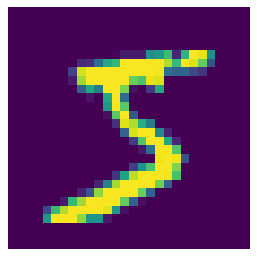

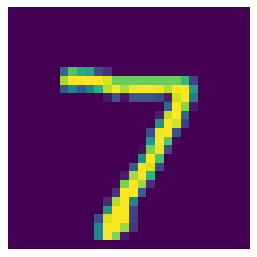

In [5]:
show_image(x_train[0])
show_image(x_test[0])

In [6]:
masks = {}
for i in range(10):
    masks[i] = y_train == i
    
masks_test = {}
for i in range(10):
    masks_test[i] = y_test == i

In [7]:
data = {}
for i in range(10):
    data[i] = x_train[masks[i]]
    
data_t = {}
for i in range(10):
    data_t[i] = x_test[masks_test[i]]

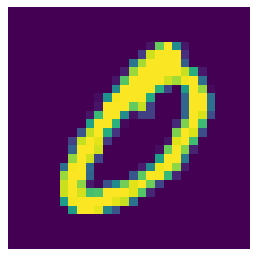

In [8]:
show_image(data[0][4004])

In [9]:
kernels = []

In [10]:
# rect
kernels.append(np.array([
    [-1, -1, -1, -1],
    [-0.1,-0.1,-0.1,-0.1],
    [ 0.1, 0.1, 0.1, 0.1],
    [ 1, 1, 1, 1]
]) / 4)

kernels.append(np.array([
    [ 1, 1, 1, 1],
    [ 0.1, 0.1, 0.1, 0.1],
    [-0.1,-0.1,-0.1,-0.1],
    [-1, -1, -1, -1]
]) / 4)

kernels.append(np.array([
    [ 1, 0.1, -0.1, -1],
    [ 1, 0.1, -0.1, -1],
    [ 1, 0.1, -0.1, -1],
    [ 1, 0.1, -0.1, -1]
]) / 4)

kernels.append(np.array([
    [ -1, -0.1, 0.1, 1],
    [ -1, -0.1, 0.1, 1],
    [ -1, -0.1, 0.1, 1],
    [ -1, -0.1, 0.1, 1]
]) / 4)

In [11]:

# diag
kernels.append(np.array([
    [1, 0.75, 0.25, 0],
    [0.75, 0.25, 0, -0.25],
    [0.25, 0, -0.25, -0.75],
    [0, -0.25, -0.75, -1]
]) / 4)

kernels.append(np.array([
    [0, 0.25, 0.75, 1],
    [-0.25, 0, 0.25, 0.75],
    [-0.75, -0.25, 0, 0.25],
    [-1, -0.75, -0.25, 0]
]) / 4)

kernels.append(np.array([
    [-1, -0.75, -0.25, 0],
    [-0.75, -0.25, 0, 0.25],
    [-0.25, 0, 0.25, 0.75],
    [0, 0.25, 0.75, 1]
]) / 4)

kernels.append(np.array([
    [0, -0.25, -0.75, -1],
    [0.25, 0, -0.25, -0.75],
    [0.75, 0.25, 0, -0.25],
    [1, 0.75, 0.25, 0]
]) / 4)

In [12]:
# other
kernels.append(np.array([
    [ -1, -0.25, 0.5, 1],
    [-0.25,0.5, 1.0, 0.5],
    [ 0.5, 1.0, 0.5, -0.25],
    [ 1.0, 0.5,-0.25, -1]
]) / 4)

kernels.append(np.array([
    [ 1, 0.5, -0.25, -1],
    [0.5,  1, 0.5, -0.25],
    [-0.25,0.5, 1, 0.5],
    [-1, -0.25, 0.5, 1]
]) / 4)

kernels.append(np.array([
    [-0.75,-0.75,-0.75,-0.75],
    [ 0.75, 0.75, 0.75, 0.75],
    [ 0.75, 0.75, 0.75, 0.75],
    [-0.75,-0.75,-0.75,-0.75]
]) / 5)

kernels.append(np.array([
    [-0.75, 0.75, 0.75,-0.75],
    [-0.75, 0.75, 0.75,-0.75],
    [-0.75, 0.75, 0.75,-0.75],
    [-0.75, 0.75, 0.75,-0.75]
]) / 5)

In [13]:
# corners
kernels.append(np.array([
    [ 0.1, 0, -0.75,-1],
    [ 1, 1, 0.25,-0.75],
    [0.5, 0.5, 1, 0],
    [ -1, 0.5, 1, 0.1]
]) / 5)

kernels.append(np.array([
    [-1.0, 0.5, 1.0,  0.1],
    [ 0.5, 0.5, 1.0,  0.0],
    [ 1.0, 1.0, 0.25,-0.75],
    [ 0.1, 0.0,-0.75,-1.0]
]) / 5)

kernels.append(np.array([
    [ 0.1, 1.0, 0.5,-1.0],
    [ 0.0, 1.0, 0.5, 0.5],
    [-0.7, 0.25,1.0, 1.0],
    [-1.0,-0.75,0.0, 0.1]
]) / 4)

kernels.append(np.array([
    [-1.0,-0.75,0.0, 0.1],
    [-0.7, 0.25,1.0, 1.0],
    [ 0.0, 1.0, 0.5, 0.5],
    [ 0.1, 1.0, 0.5,-1.0]
]) / 4)

In [14]:
# sobel filter
kernels.append(np.array([
    [1, 0.1,-0.1,-1],
    [3, 1, -1, -3],
    [3, 1, -1, -3],
    [1, 0.1,-0.1,-1]
]) / 10)

kernels.append(np.array([
    [-1, -0.1,0.1,1],
    [-3, -1, 1, 3],
    [-3, -1, 1, 3],
    [-1, -0.1,0.1,1]
]) / 10)

kernels.append(np.array([
    [   1, 3, 3, 1],
    [ 0.1, 1, 1, 0.1],
    [-0.1,-1,-1,-0.1],
    [  -1,-3,-3, -1]
]) / 10)

kernels.append(np.array([
    [ -1, -3,-3, -1],
    [-0.1,-1,-1,-0.1],
    [ 0.1, 1, 1, 0.1],
    [  1, 3, 3, 1]
]) / 10)

In [15]:
kernels = np.stack(kernels)*2
# kernels += np.random.normal(0, 0.05, size=kernels.shape)
kernels.shape

(20, 4, 4)

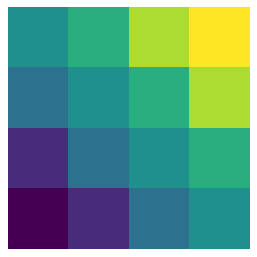

In [16]:
show_image(kernels[5])

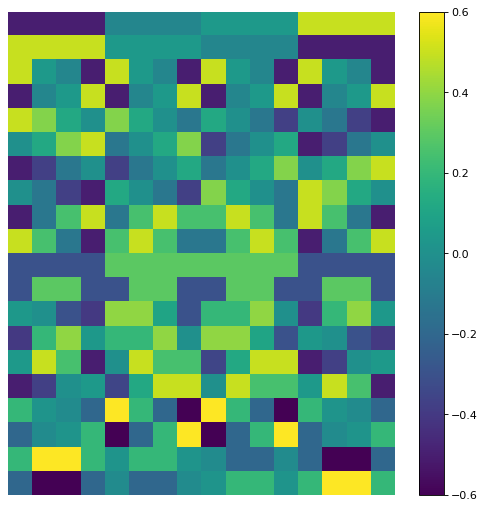

In [17]:
fig, ax = plt.subplots(figsize=(8,8), dpi=80)
im = ax.imshow(kernels.reshape(-1,16))
ax.axis('off')
fig.colorbar(im, ax=ax)
plt.show()

# Define Network Architecture

In [18]:
net = neurons.Network()
ntype = neurons.LIFrate

params = {
    'v_rest': -70,
    'v_thres': -55,
    'R': 15,
    'gamma': 0.2,
    'theta': 0.2,
    'tau_s': 1
}

In [19]:
for i in range(9):
    for j in range(9):
        net.add(neurons.Sensory, 16, f'input_pos{i:2d}_{j:2d}')

for i in range(9):
    for j in range(9):
        net.add(ntype, kernels.shape[0], f'filters_pos{i:2d}_{j:2d}', **params)

net.add(ntype, 10, 'output', **params)

In [20]:
for i in range(9):
    for j in range(9):
        net.connect(f'input_pos{i:2d}_{j:2d}', f'filters_pos{i:2d}_{j:2d}')

for i in range(9):
    for j in range(9):
        net.connect(f'filters_pos{i:2d}_{j:2d}', 'output')

In [21]:
net.compile()

initializing neurons... done.
checking if graph is connected... done.
initializing history... done.
model successfully compiled.



In [22]:
for i in range(9):
    for j in range(9):
        net.bundles[f'filters_pos{i:2d}_{j:2d}'].synapses = kernels.reshape(kernels.shape[0], 16)

# Define some functions for plotting

In [23]:
def plot_synapses(synapses):
    fig, ax = plt.subplots(figsize=(16,6), dpi=80)
    ax.set_title('Synaptic Weights')
    ax.set_xlabel('Pre-Synaptic Neuron')
    ax.set_ylabel('Post-Synaptic Neuron')
    im = ax.pcolormesh(np.arange(synapses.shape[1]), np.arange(synapses.shape[0]), synapses, shading='nearest', cmap=cmap)#, norm=Normalize(-1,1))
    fig.colorbar(im, ax=ax)
    plt.show()

In [24]:
def plot_voltages(voltage_history, **kwargs):
    fig, ax = plt.subplots(figsize=(16,6), dpi=80)
    ax.set_title('Membrane Potential')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Neuron #')
    ax.set(**kwargs)
    im = ax.pcolormesh(np.arange(voltage_history.shape[0]) * dt, np.arange(voltage_history.shape[1]), voltage_history.T, shading='nearest', cmap=cmap)
    fig.colorbar(im, ax=ax, label='Voltage [mV]')
    plt.show()

In [25]:
def plot_outputs(output_history, **kwargs):
    fig, ax = plt.subplots(figsize=(16,6), dpi=80)
    ax.set_title('Spikes')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Neuron #')
    ax.set(**kwargs)
    im = ax.pcolormesh(np.arange(output_history.shape[0]) * dt, np.arange(output_history.shape[1]), output_history.T, shading='nearest', cmap='gray_r', norm=Normalize(0,1))
    ax.grid(alpha=0.2)
    fig.colorbar(im, ax=ax, label='Firing Rate [1/max_rate]')
    plt.show()

In [26]:
def plot_history_choice(history, choice=0, title=None, **kwargs):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14,12), dpi=80, sharex=True, constrained_layout=True)
    fig.suptitle(title)
    
    ax1.set_title('current')
    ax1.plot(np.arange(history.current.shape[0]) * dt, history.current.T[choice], lw=1)
    ax1.set_ylabel('current [mA]')
    ax1.set(**kwargs)
    ax1.grid(alpha=0.2)
    
    ax2.set_title('membrane potential')
    ax2.plot(np.arange(history.voltage.shape[0]) * dt, history.voltage.T[choice], '-', lw=1)
    ax2.set_ylabel('voltage [mV]')
#     ax2.set_ylim(-120, 0)
    ax2.set(**kwargs)
    ax2.grid(alpha=0.2)
    
    ax3.set_title('spikes')
    ax3.plot(np.arange(history.outputs.shape[0]) * dt, history.outputs.T[choice], '-', lw=1)
    ax3.set_xlabel('time [s]')
    ax3.set_ylabel('firing rate')
    ax3.set_ylim(0,1)
    ax3.set(**kwargs)
    ax3.grid(alpha=0.2)
    
    plt.show()

# Training Simulation

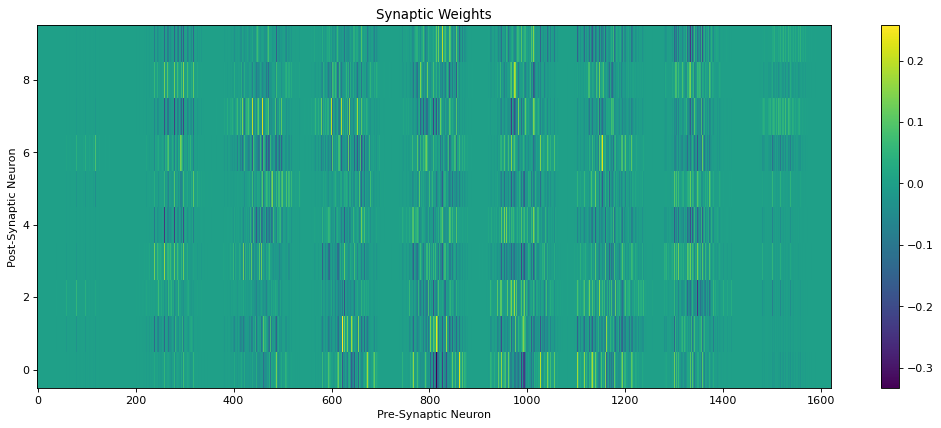

In [27]:
net.bundles['output'].synapses[:] = np.load('20x4x4_receptive_fields_synapses.npy')
plot_synapses(net.bundles['output'].synapses)

In [60]:
net.reset_history()
net.record_history = True

net.bundles['output'].train = True


dt = 0.001
n_digits_per_class = 10
time_per_digit = 1
start = 1370

steps_per_digit = int(time_per_digit / dt)
steps = n_digits_per_class*10*steps_per_digit
time = time_per_digit * n_digits_per_class * 10

print(f"total time: {time} seconds")
print(f"time_per_digit: {time_per_digit} seconds")
print()
print(f"dt: {dt}")
print(f"total_steps: {steps}")
print(f"steps per digit: {steps_per_digit}")
print()

print("begin simulation...")
for i in range(start, start + n_digits_per_class):
    for j in range(10):
        for m in range(9):
            for n in range(9):
                net.bundles[f'input_pos{m:2d}_{n:2d}'].outputs = data[j][i][3*m:3*m+4,3*n:3*n+4].reshape(-1)
        net.bundles['output'].stim = (np.array([l == j for l in range(10)])*2 - 1) * 5
        for k in range(steps_per_digit):
            net.step(dt)
            print(f'{((i - start)*10*steps_per_digit + j*steps_per_digit + k+1)/steps*100:.2f}%', end='\r')

net.bundles['output'].stim = None
print('simulation ended.')

total time: 100 seconds
time_per_digit: 1 seconds

dt: 0.001
total_steps: 100000
steps per digit: 1000

begin simulation...
simulation ended.


## Network Analysis after Training Simulation

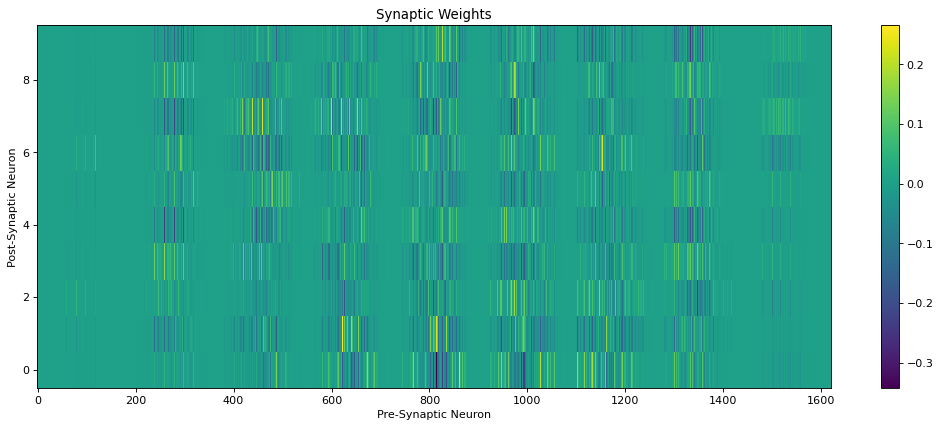

In [61]:
plot_synapses(net.bundles['output'].synapses)

In [62]:
# volts = []
# outs = []

# for m in range(9):
#     for n in range(9):
#         volts.append(net.history[f'filters_pos{m:2d}_{n:2d}'].voltage.T)
#         outs.append(net.history[f'filters_pos{m:2d}_{n:2d}'].outputs.T)

# volts = np.concatenate(volts).T
# outs = np.concatenate(outs).T

In [63]:
# plot_voltages(volts)

In [64]:
# plot_outputs(outs)

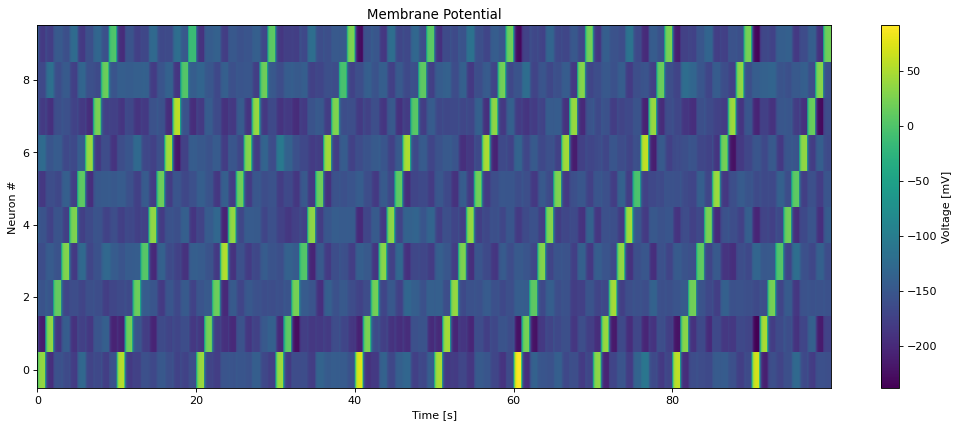

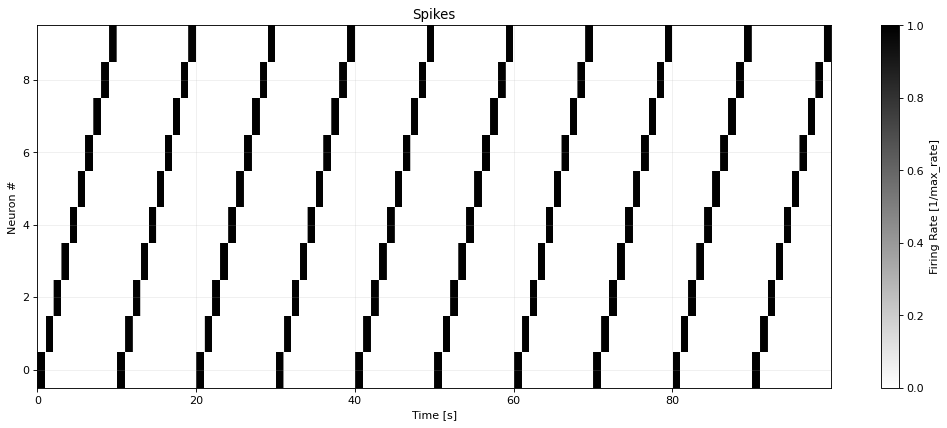

In [65]:
plot_voltages(net.history['output'].voltage)
plot_outputs(net.history['output'].outputs)

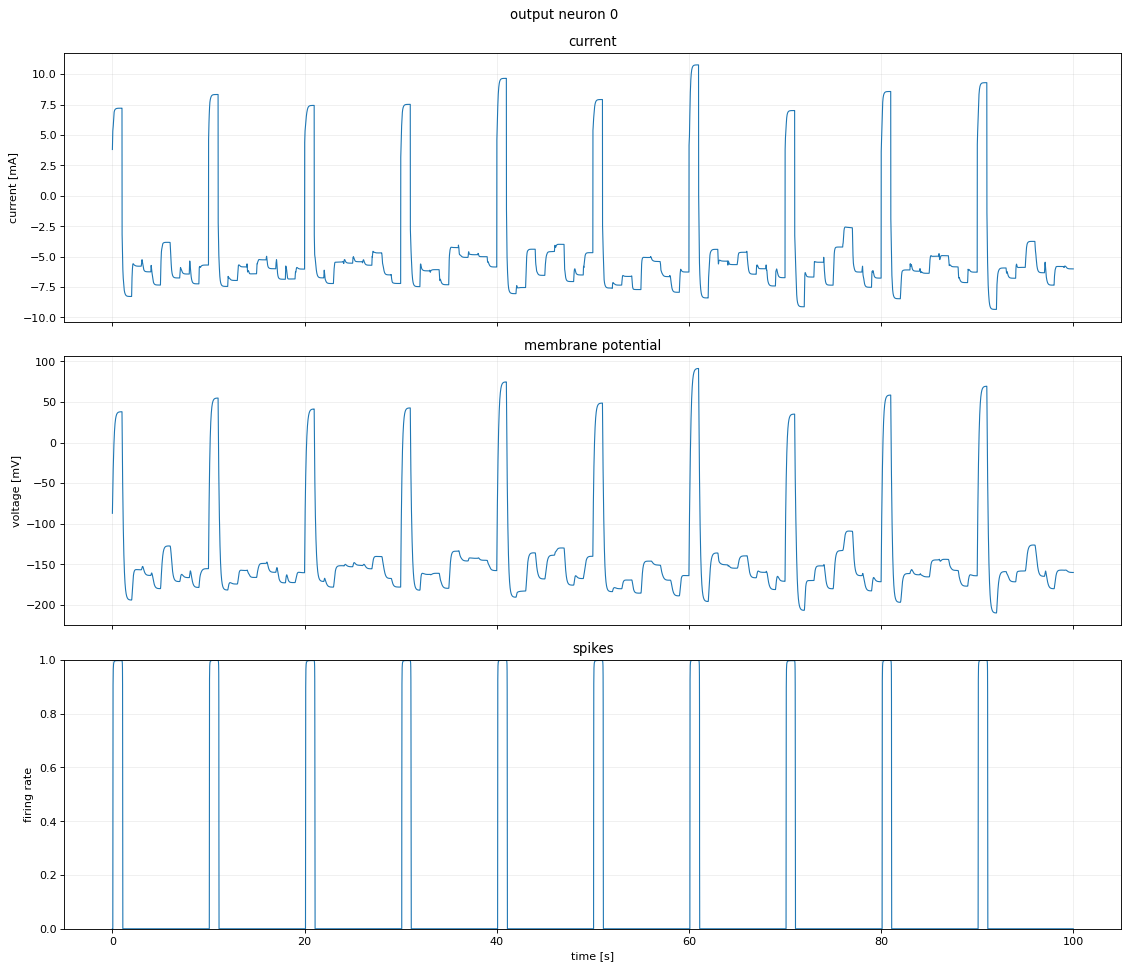

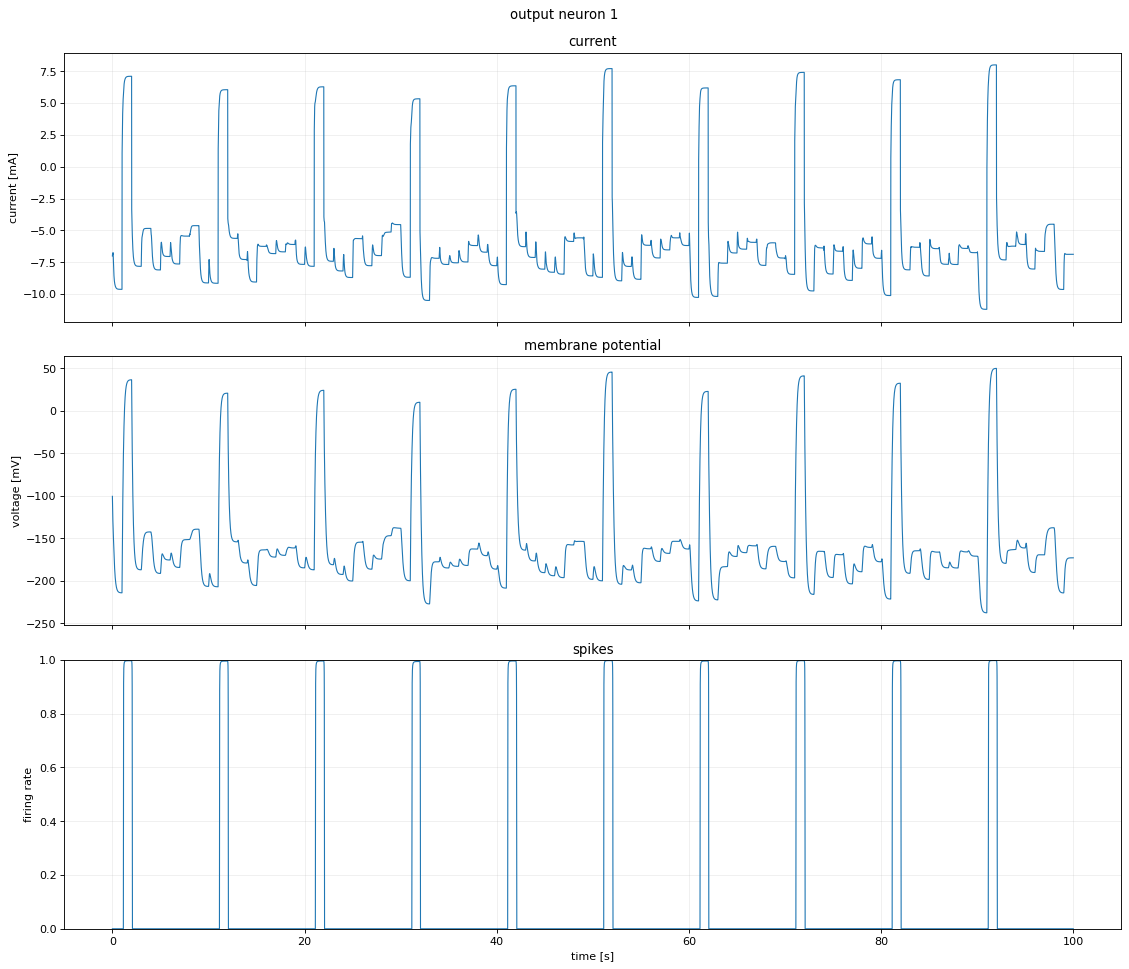

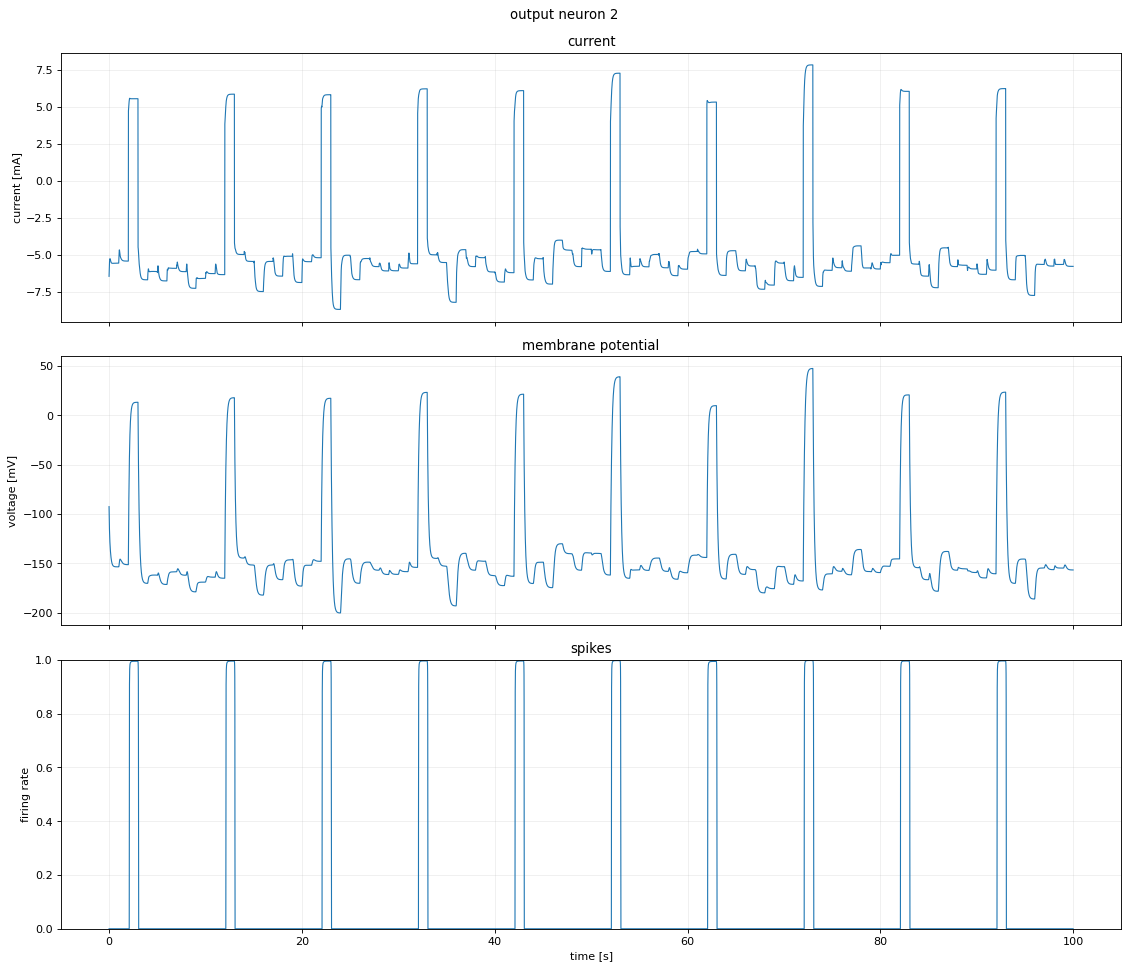

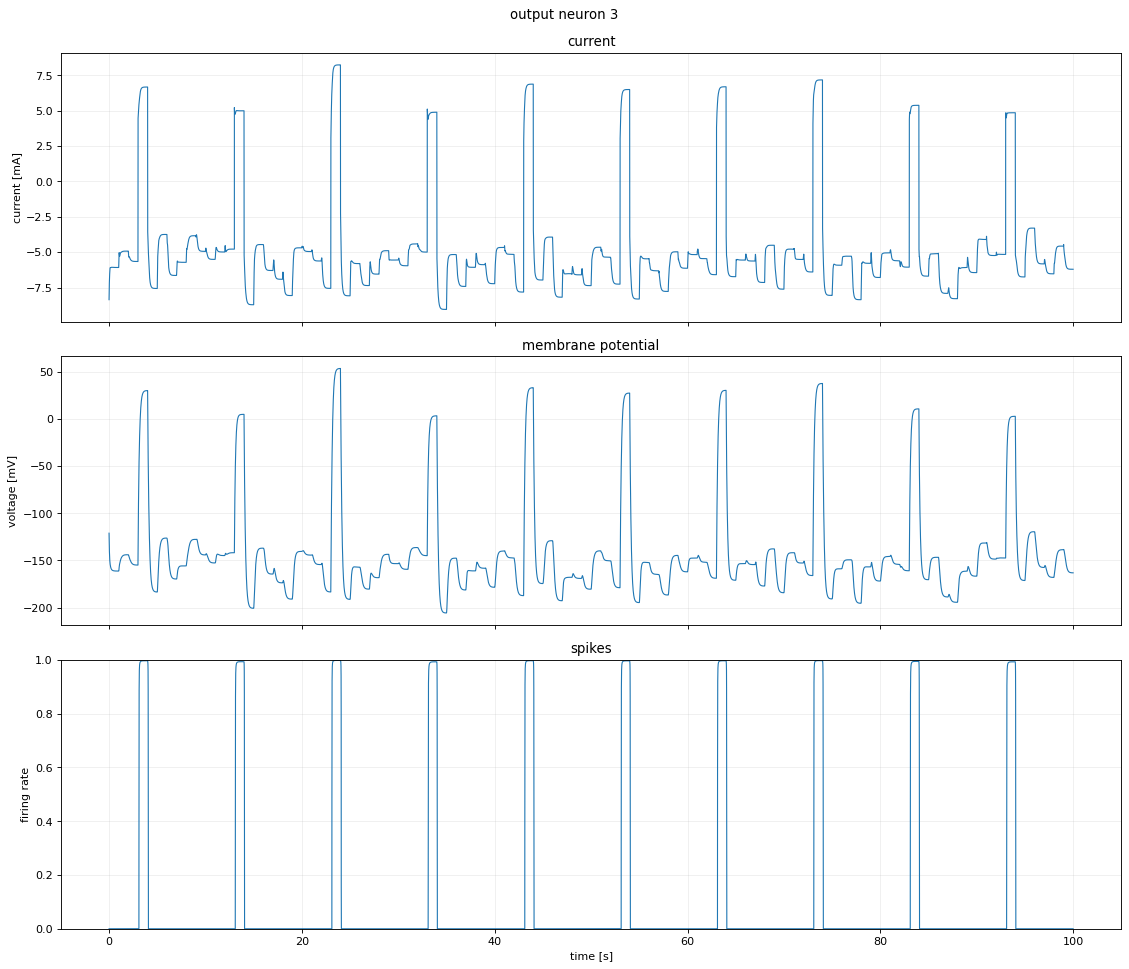

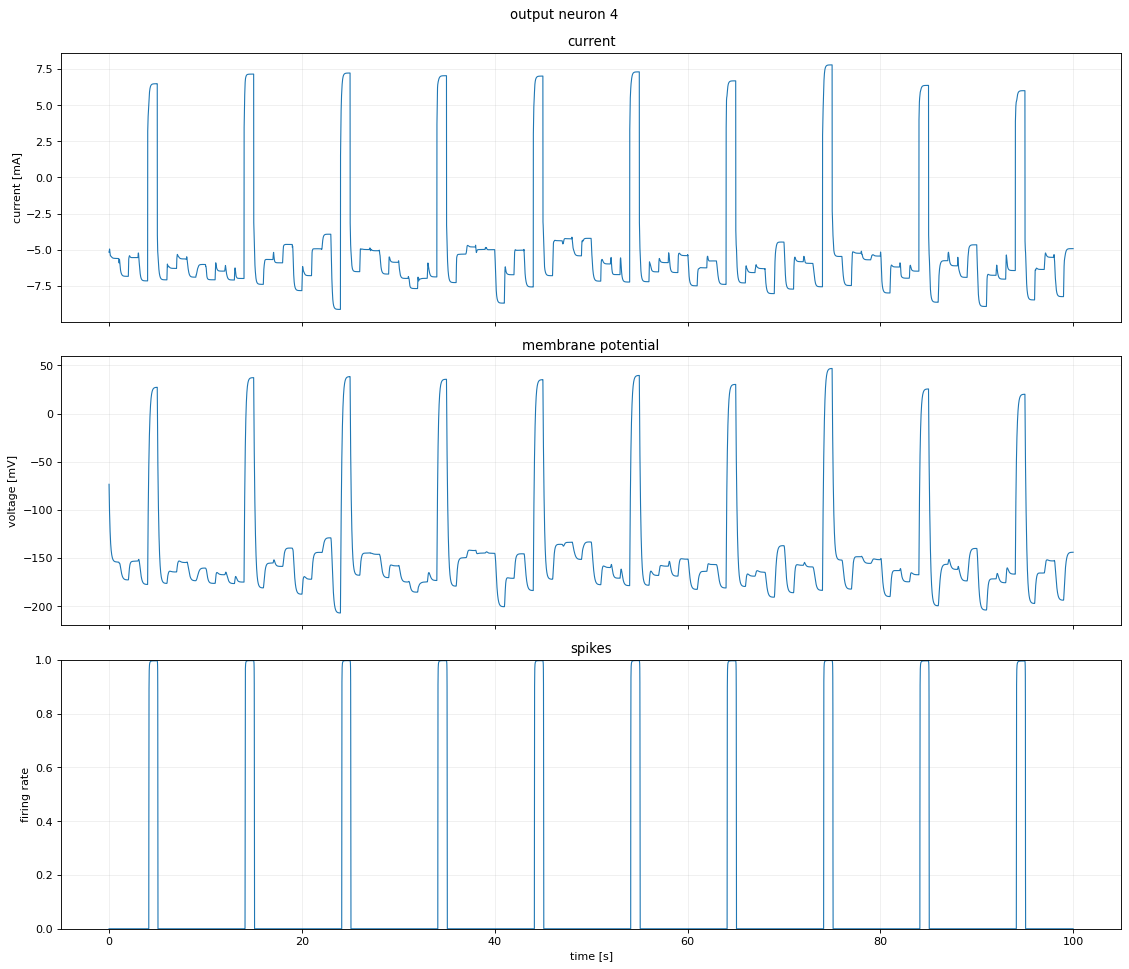

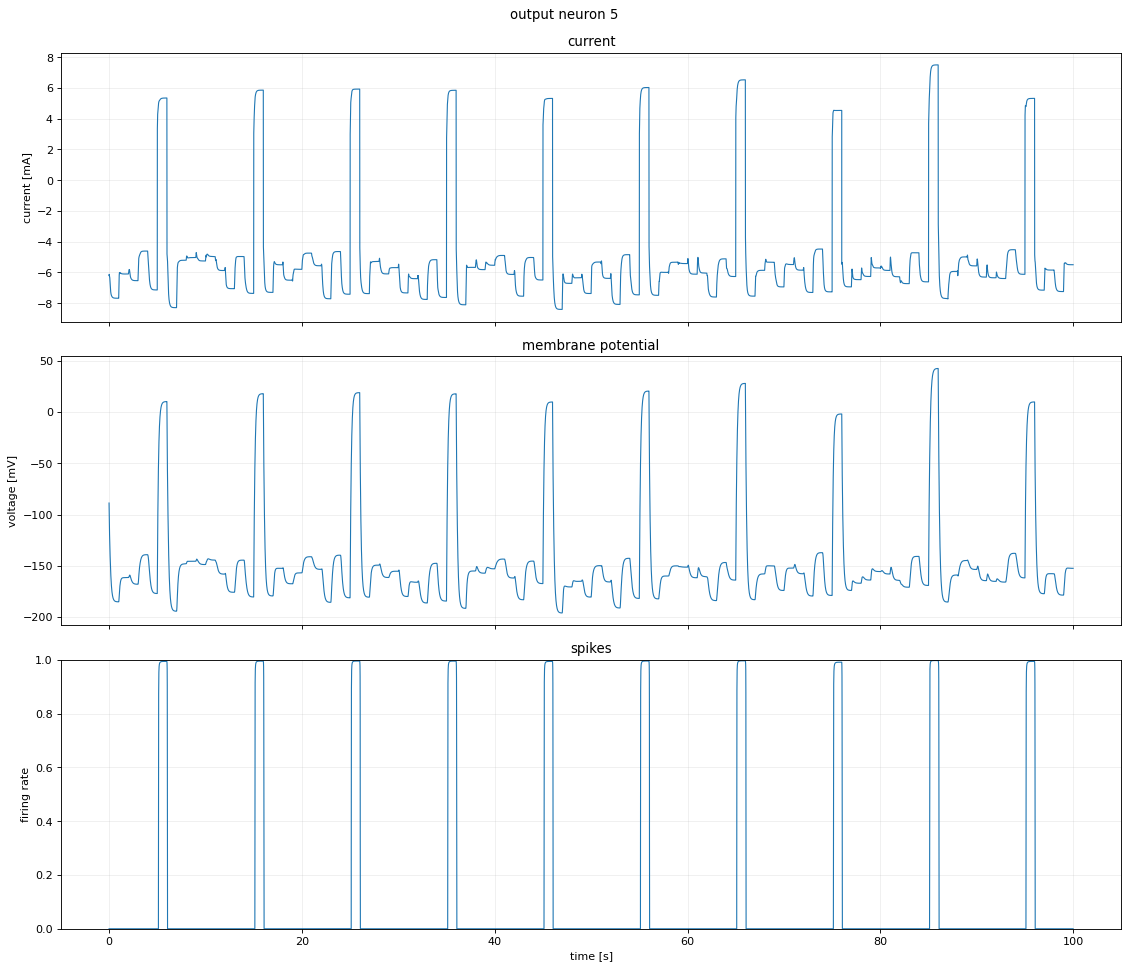

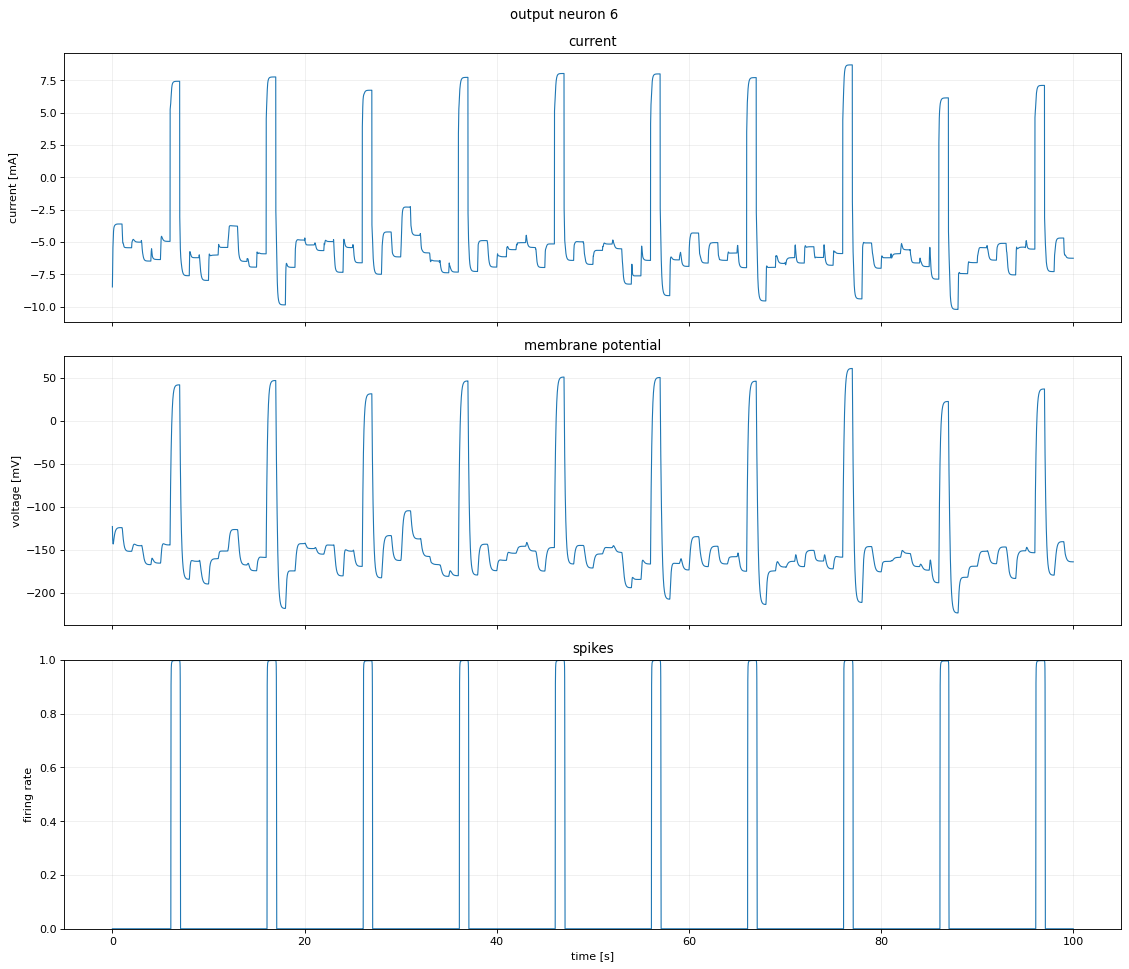

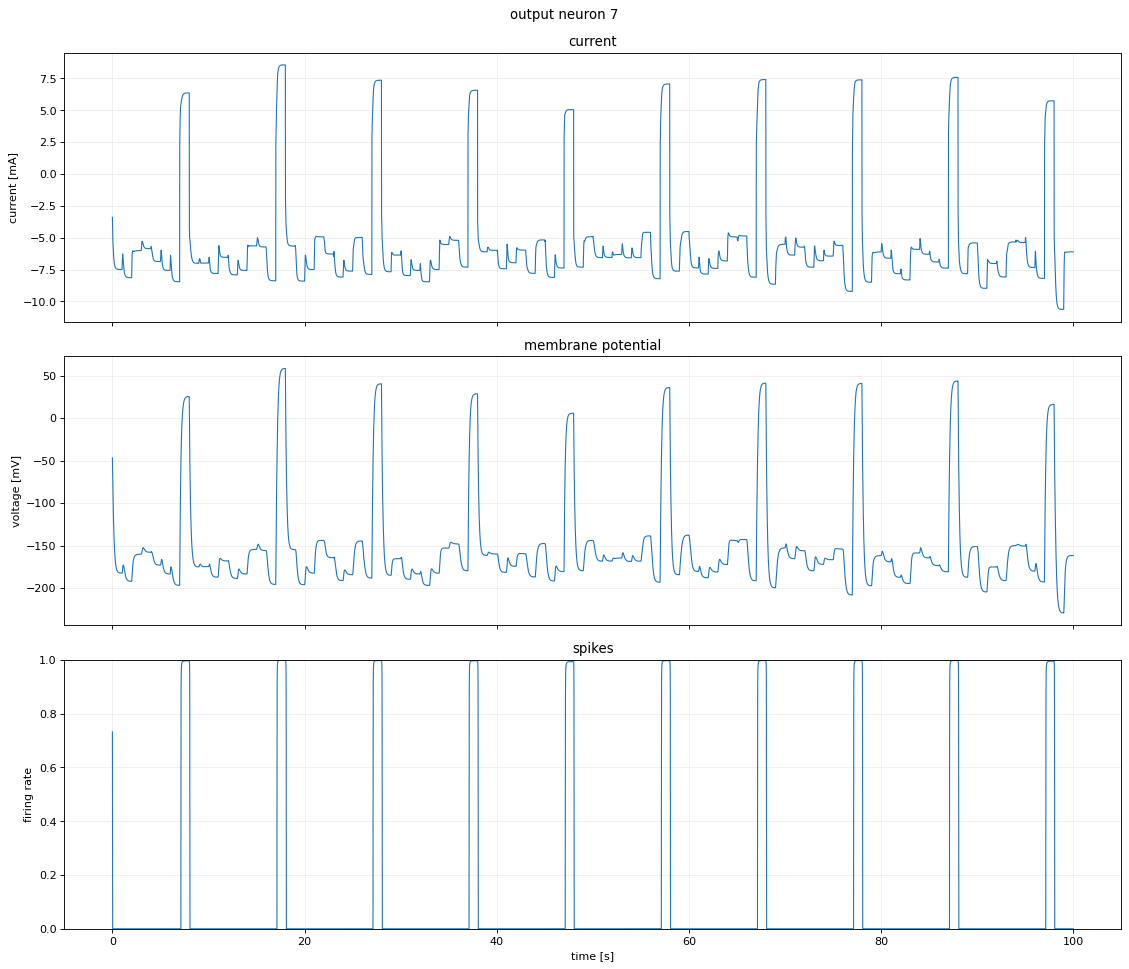

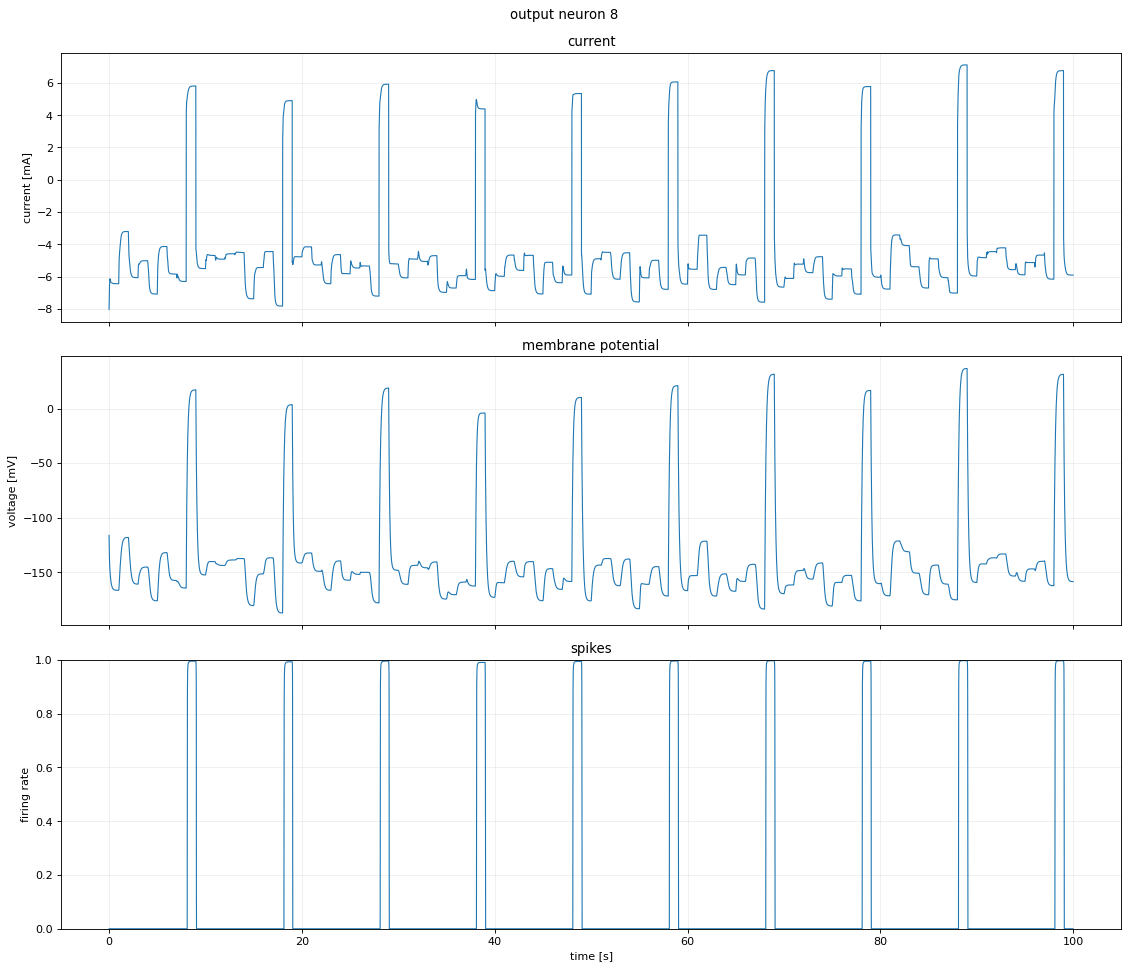

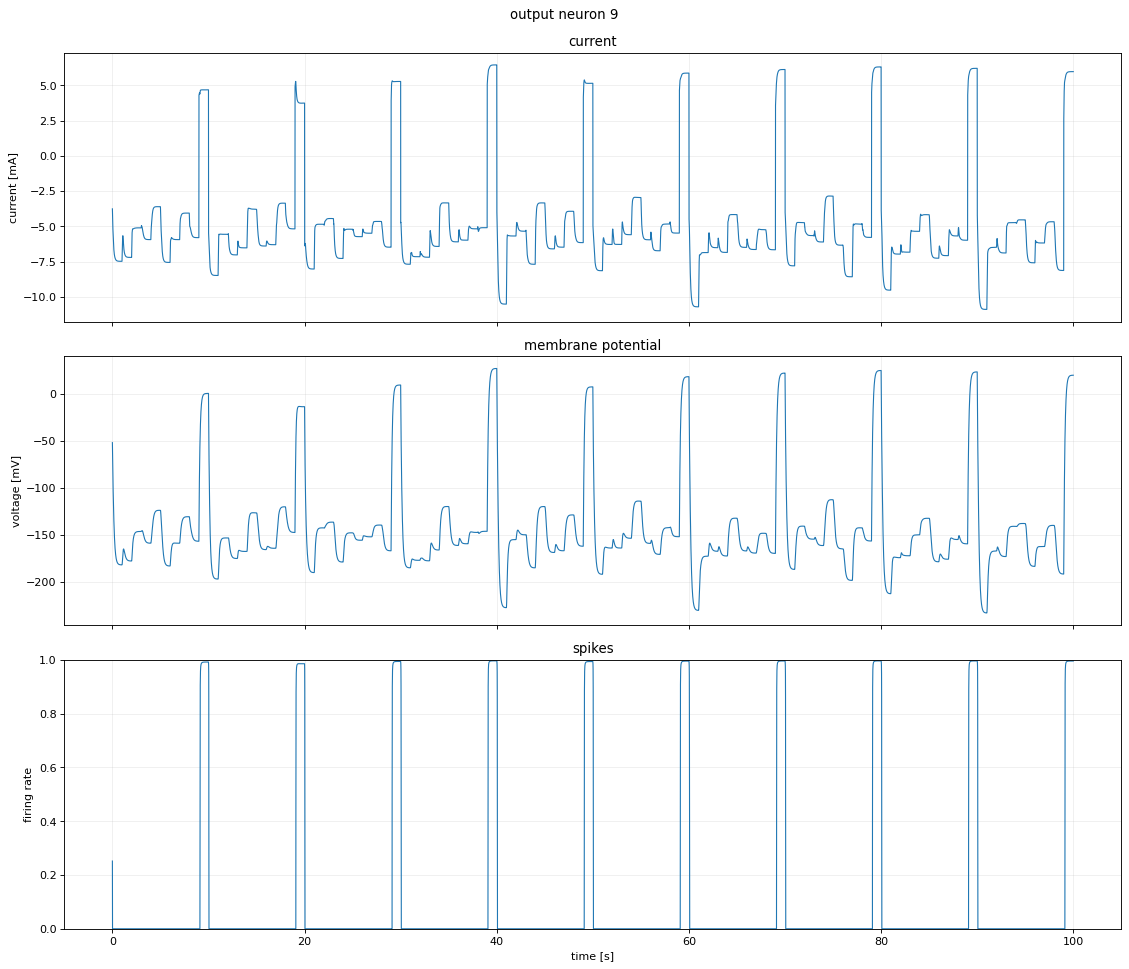

In [66]:
for i in range(10):
    plot_history_choice(net.history['output'], choice=i, title=f'output neuron {i}')

# Evaluation Simulation on Test Data

In [67]:
steps = 1000

for i in range(9):
    for j in range(9):
        net.bundles[f'input_pos{i:2d}_{j:2d}'].outputs[:] = 0

for i in range(steps):
    net.step(dt)
    print(f'{(i+1)/steps*100:.2f}%', end='\r')

In [68]:
net.train = False
net.reset_history()
net.record_history = True

dt = 0.001
time = 10
time_per_digit = 1
steps = int(time / dt)
steps_per_digit = int(time_per_digit / dt)
start = 0

print(f"total time: {time} seconds")
print(f"time_per_digit: {time_per_digit} seconds")
print()
print(f"dt: {dt}")
print(f"total_steps: {steps}")
print(f"steps per digit: {steps_per_digit}")
print()
print("begin simulation...")
for i in range(steps):
    for m in range(9):
        for n in range(9):
            net.bundles[f'input_pos{m:2d}_{n:2d}'].outputs = x_test[start+i//steps_per_digit][3*m:3*m+4,3*n:3*n+4].reshape(-1)
    net.step(dt)
    print(f'{(i+1)/steps*100:.2f}%', end='\r')

total time: 10 seconds
time_per_digit: 1 seconds

dt: 0.001
total_steps: 10000
steps per digit: 1000

begin simulation...


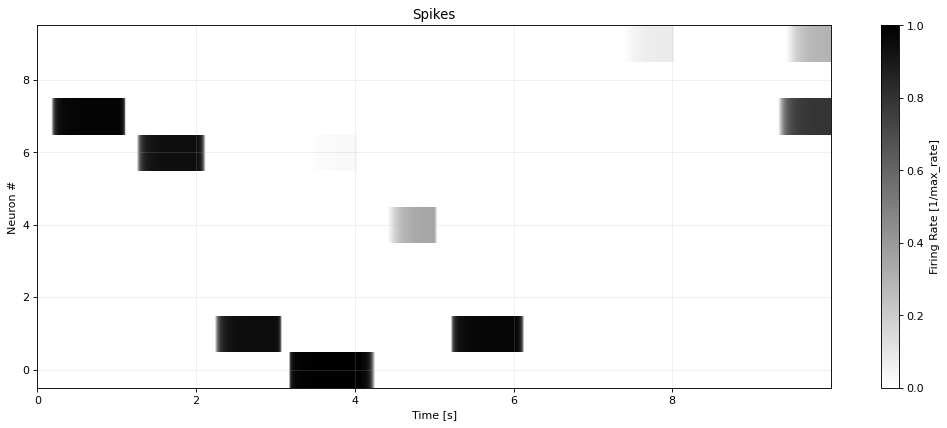

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


In [69]:
plot_outputs(net.history['output'].outputs)
print(y_test[start:start+int(time//time_per_digit)])

In [70]:
outputs = net.history['output'].outputs
predictions = outputs.reshape(-1, int(time_per_digit/dt), 10)[:,-1]
print(predictions.round(3))

[[0.    0.    0.    0.    0.    0.    0.    0.983 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.945 0.    0.    0.   ]
 [0.    0.951 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.994 0.    0.    0.    0.    0.    0.024 0.    0.    0.   ]
 [0.    0.    0.    0.    0.352 0.    0.    0.    0.    0.   ]
 [0.    0.974 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.082]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.795 0.    0.3  ]]


In [71]:
scores = []
for i, pic in enumerate(x_test[start:start+int(time//time_per_digit)]):
#     print('label:      ', int(data_test_labels[start+i]))
#     print('prediction: ', np.argmax(predictions[i]))
#     show_image(data_test[start+i])
    scores.append(int(y_test[start+i]) == np.argmax(predictions[i]))
np.mean(scores)

0.6

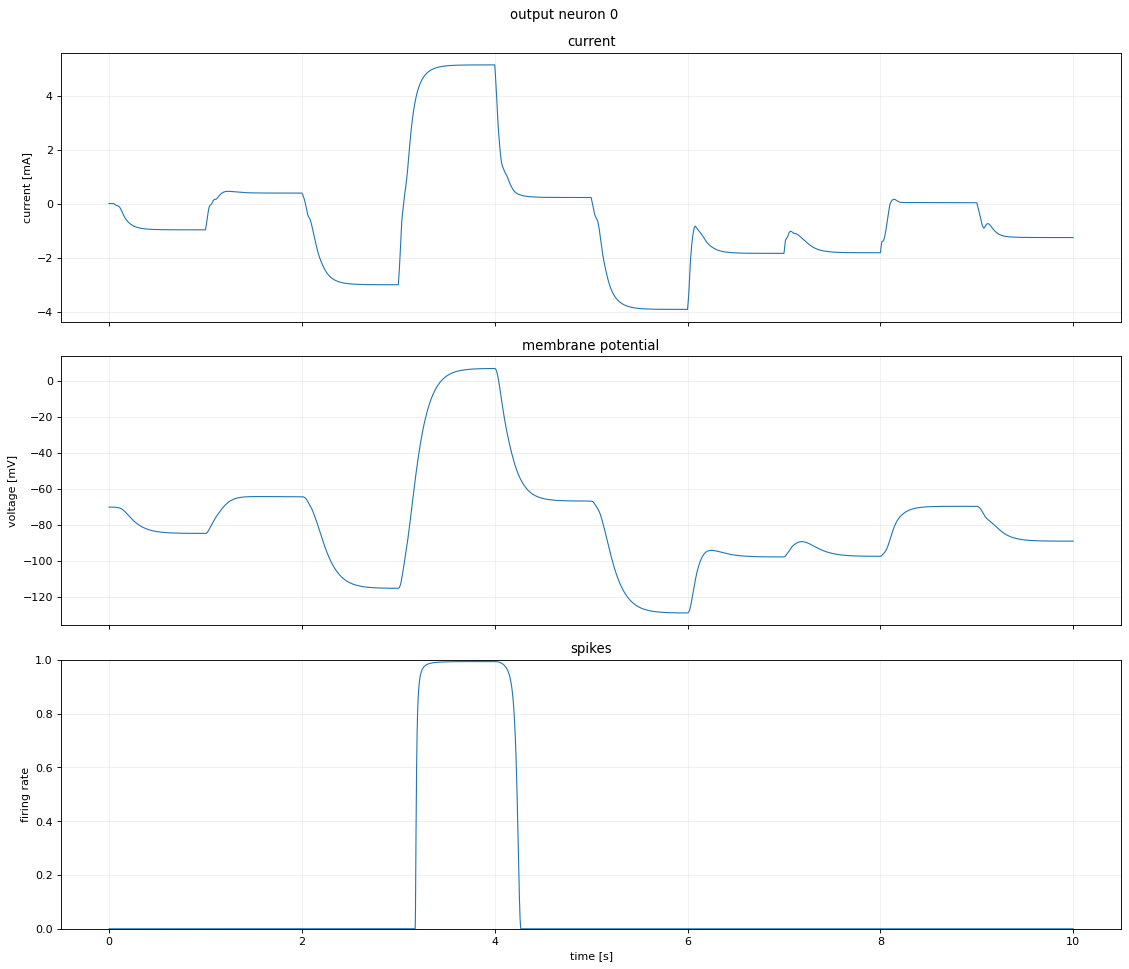

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


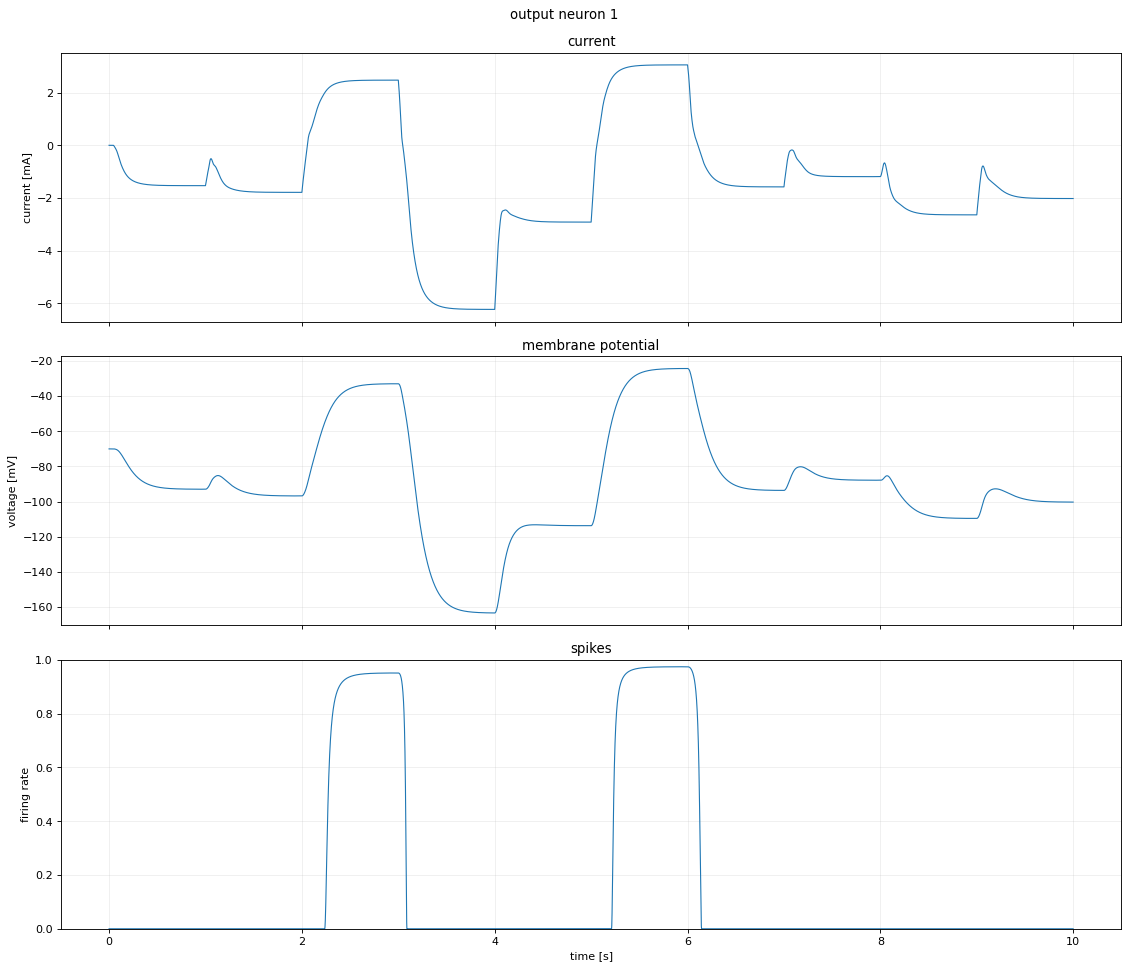

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


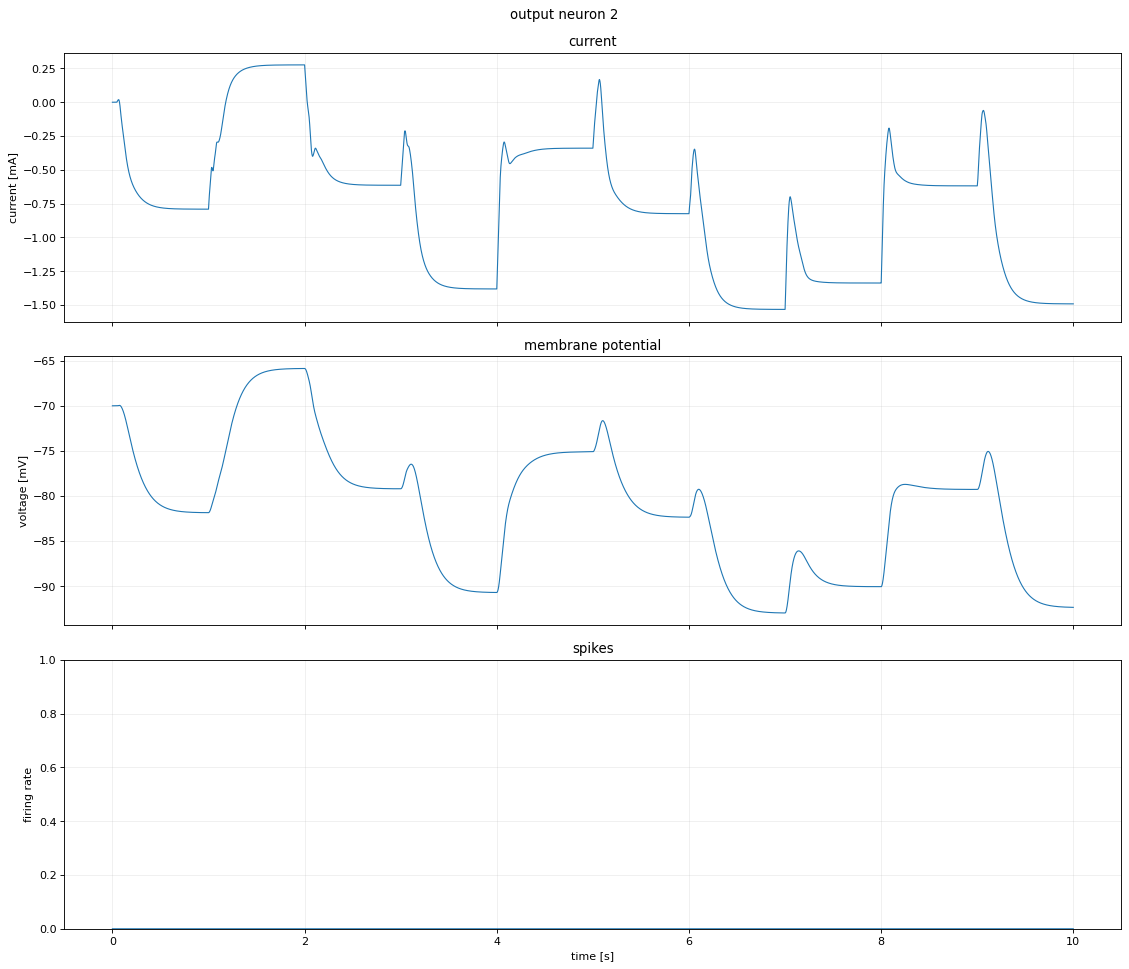

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


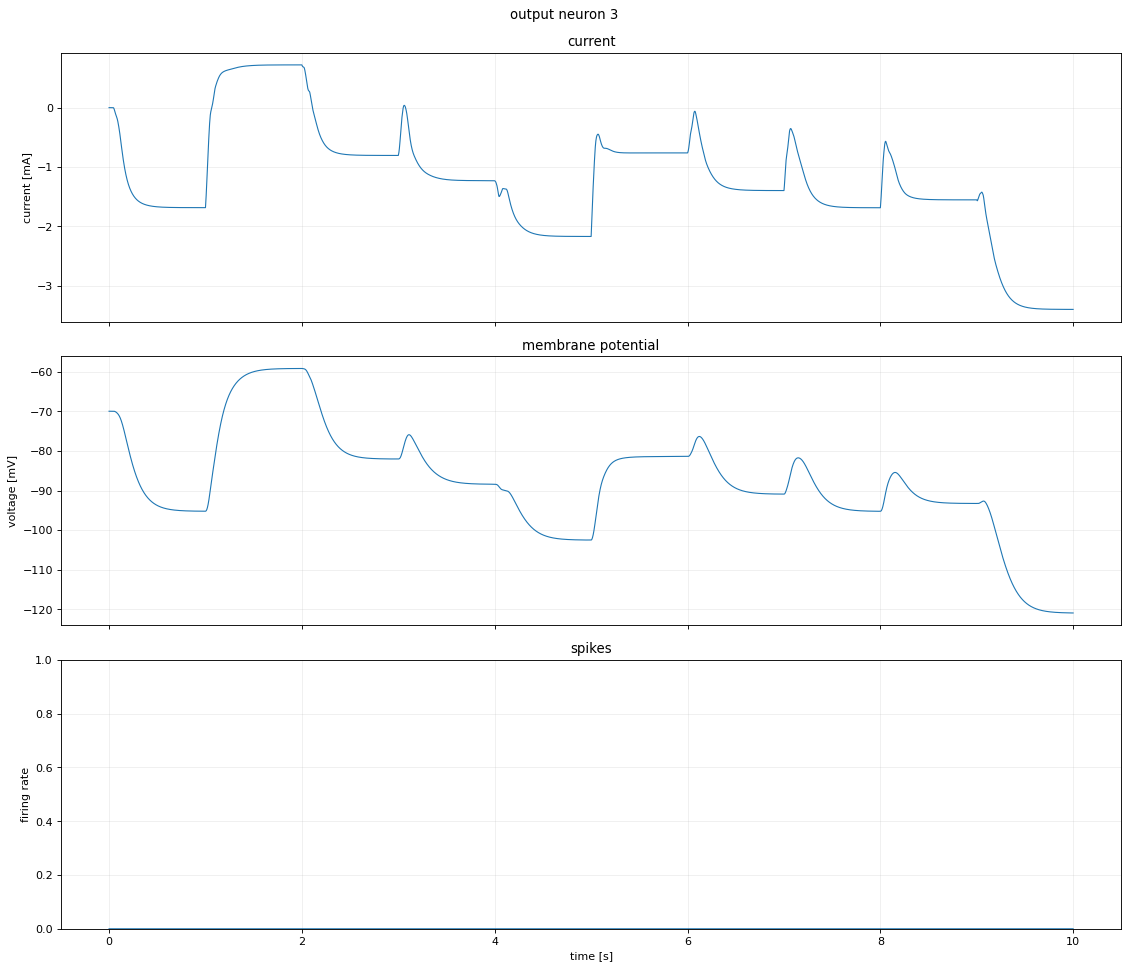

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


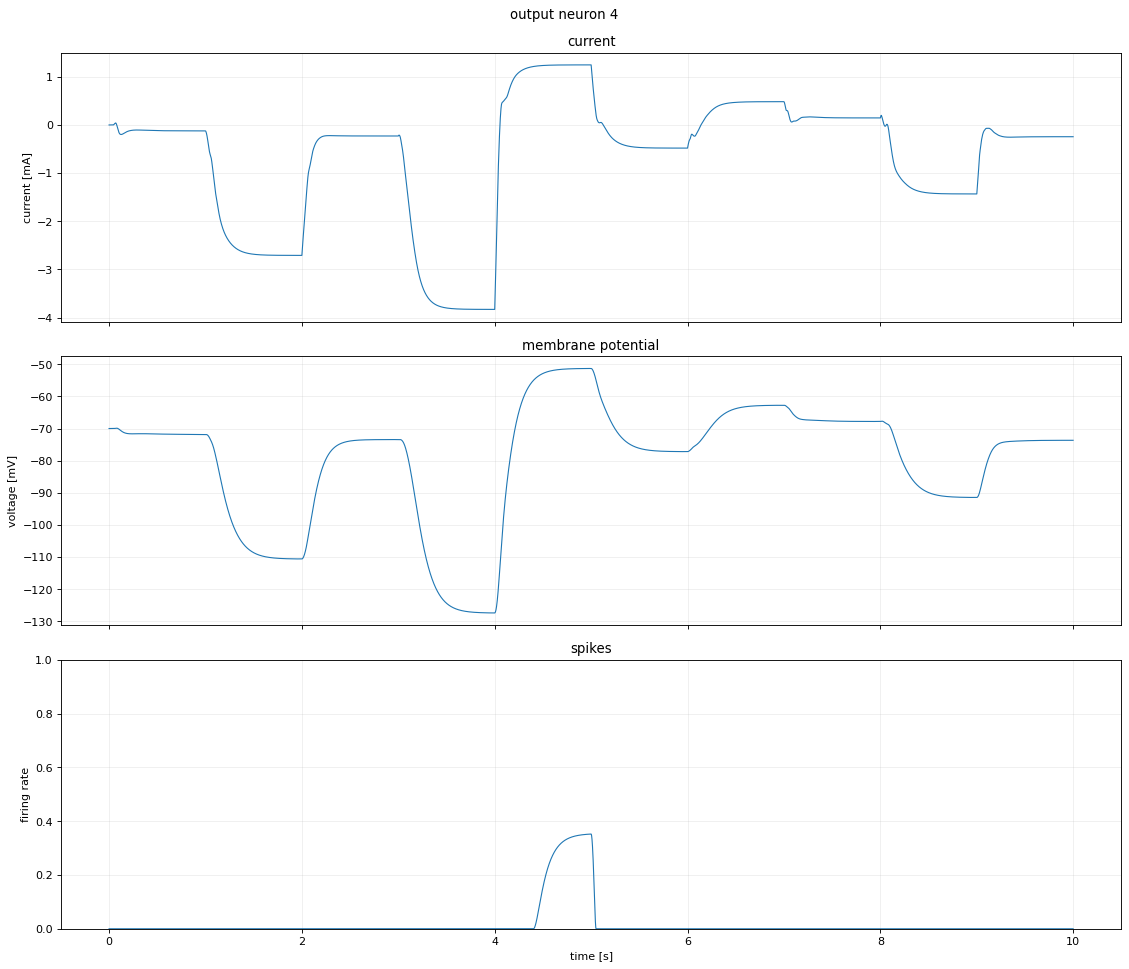

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


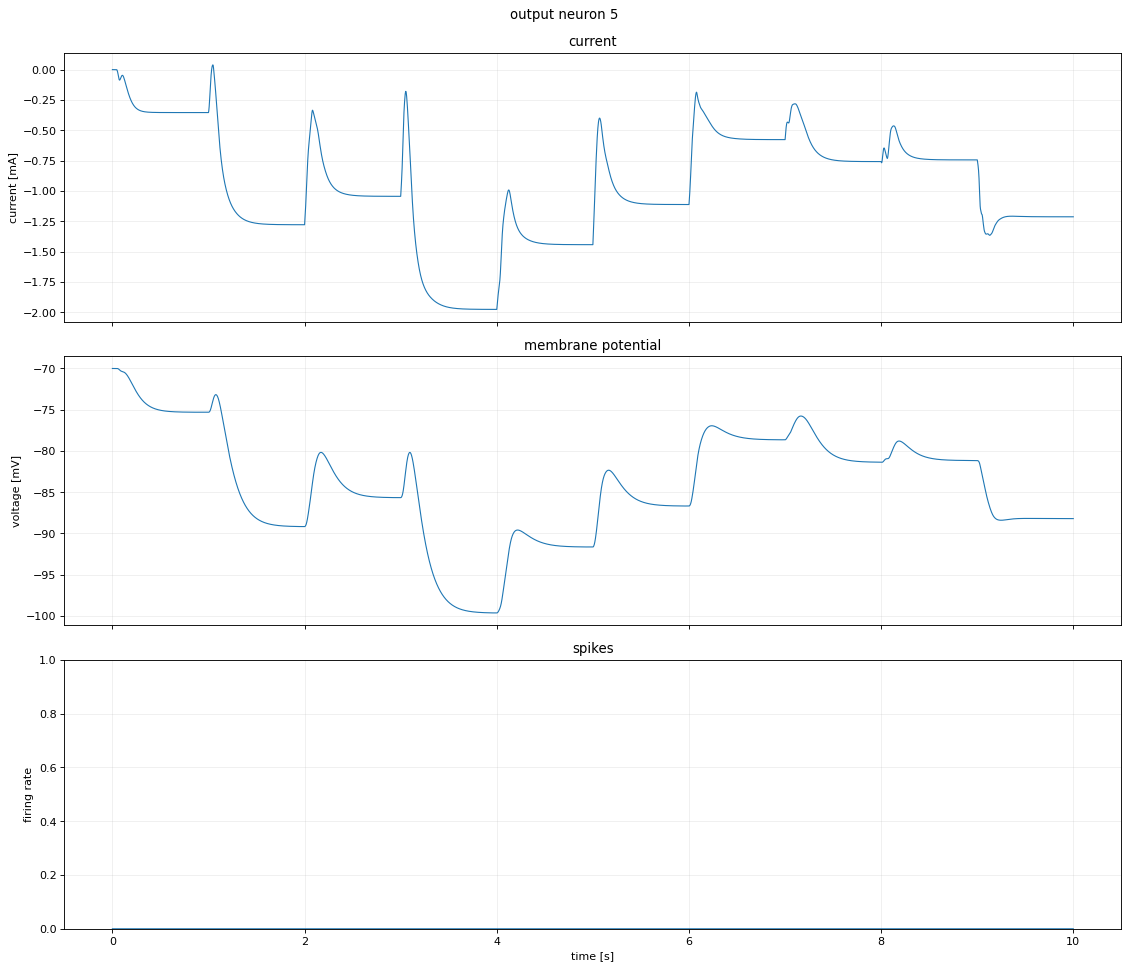

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


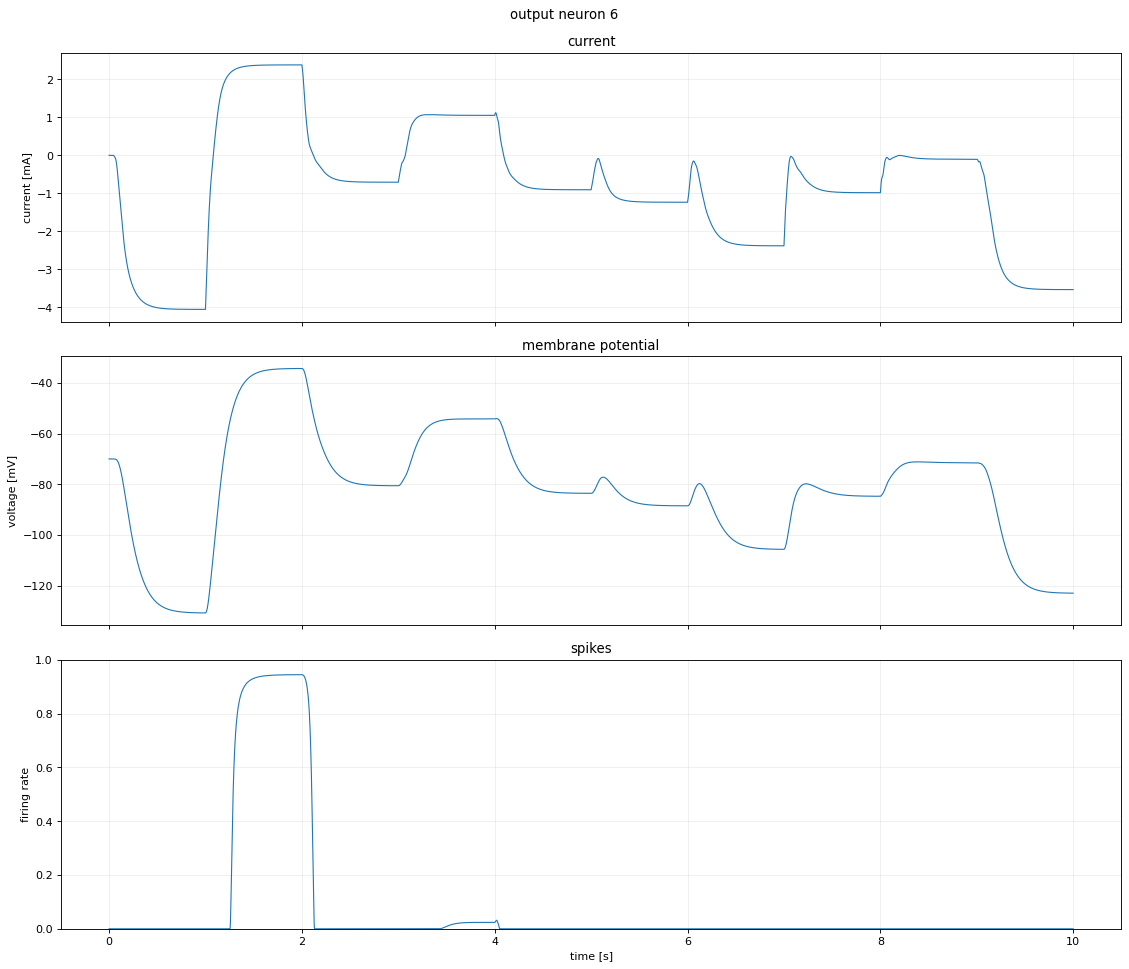

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


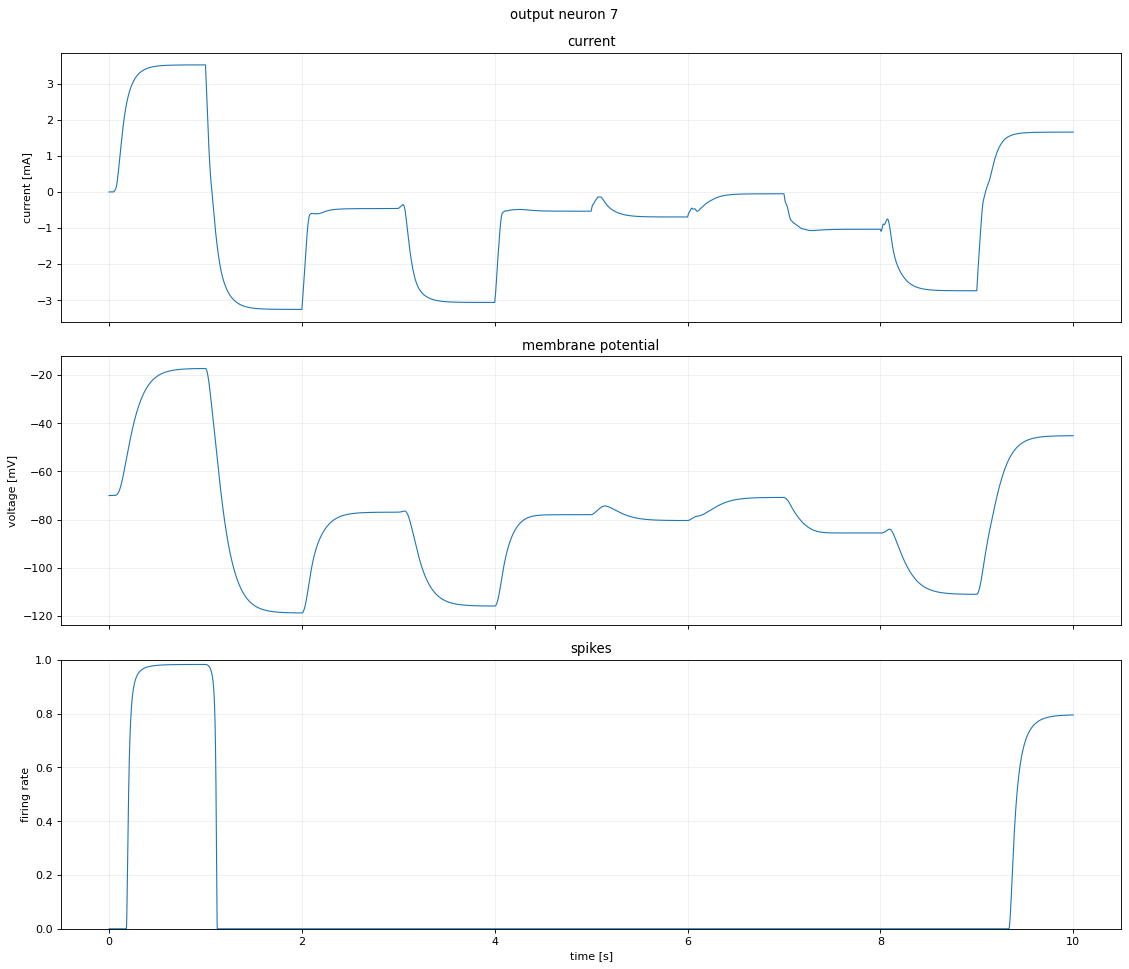

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


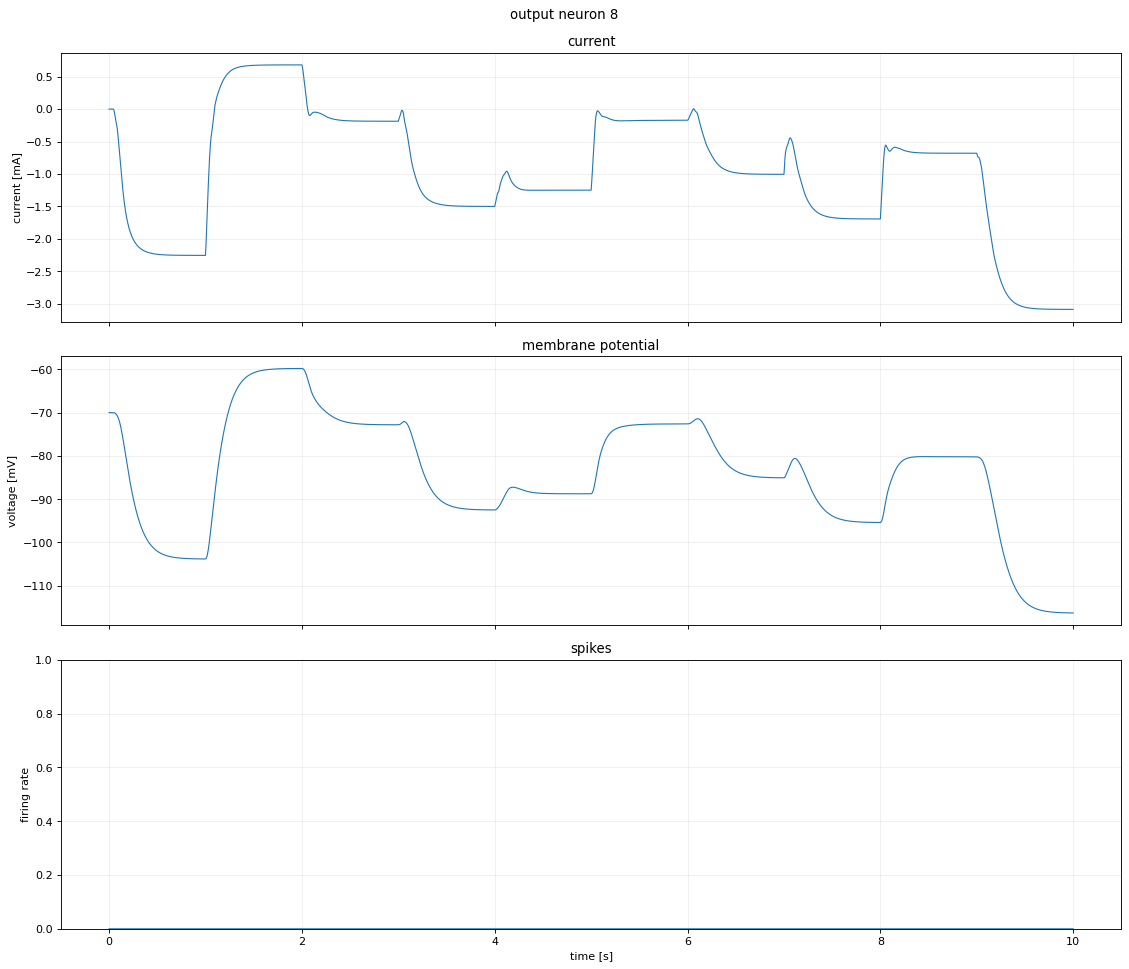

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


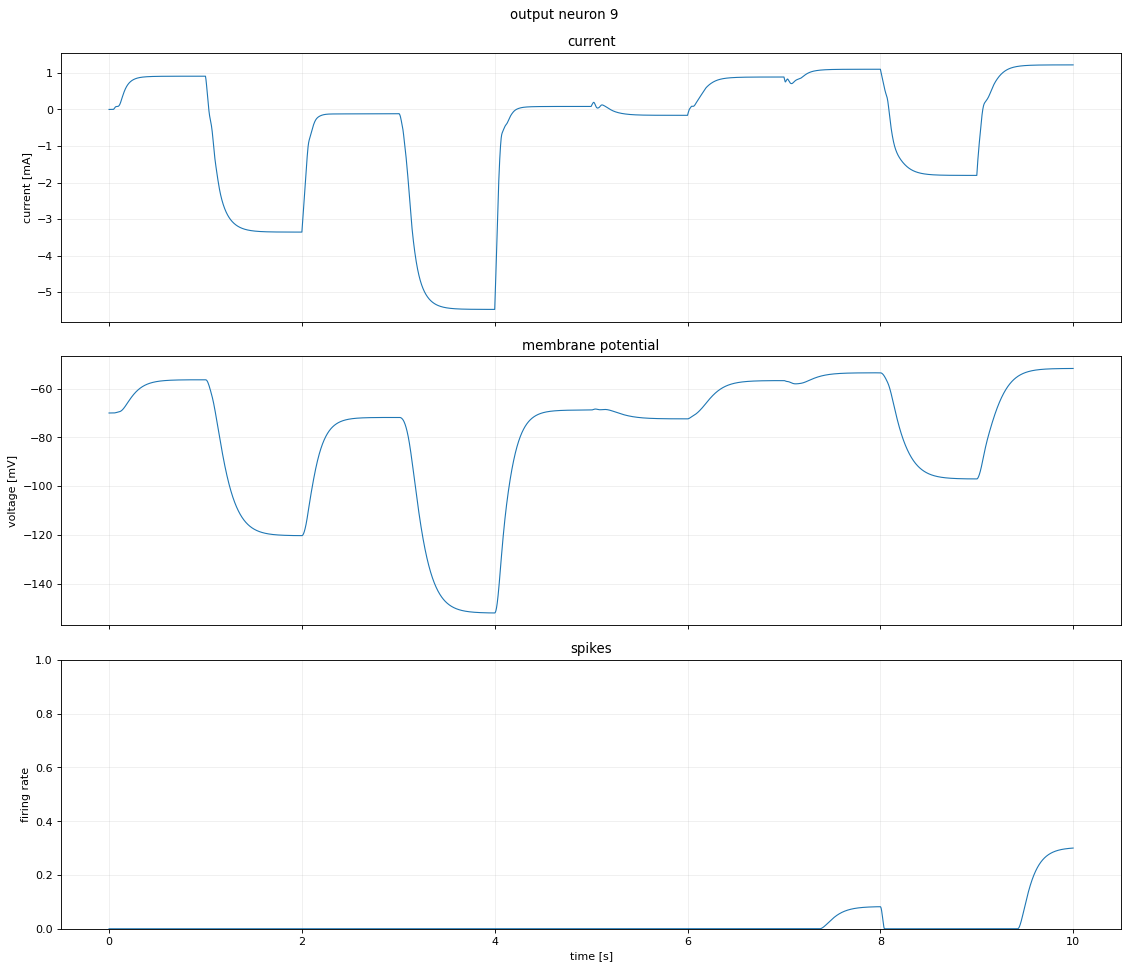

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


In [72]:
for i in range(10):
    plot_history_choice(net.history['output'], choice=i, title=f'output neuron {i}')
    print(y_test[start:start+int(time//time_per_digit)])

label:       7
prediction:  7


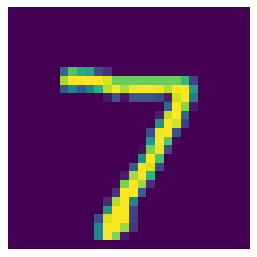

label:       2
prediction:  6


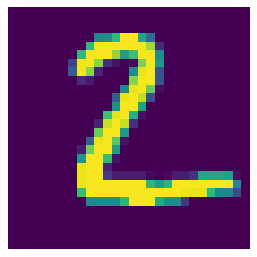

label:       1
prediction:  1


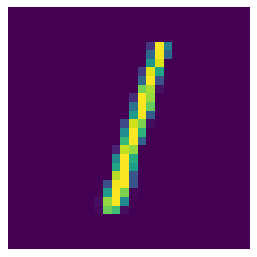

label:       0
prediction:  0


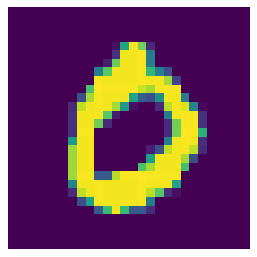

label:       4
prediction:  4


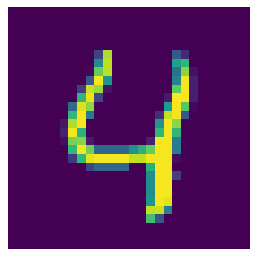

label:       1
prediction:  1


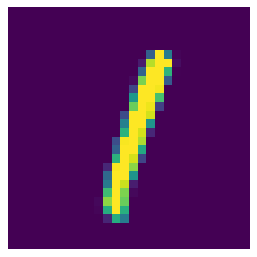

label:       4
prediction:  0


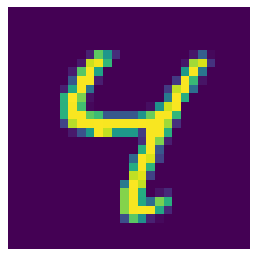

label:       9
prediction:  9


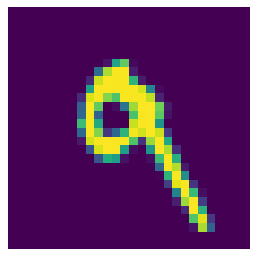

label:       5
prediction:  0


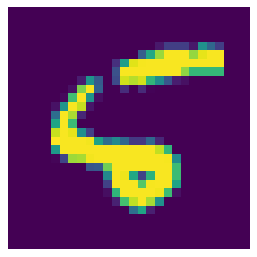

label:       9
prediction:  7


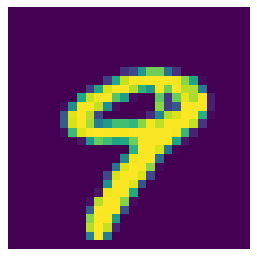

In [73]:
for i in range(start, int(start + steps / time_per_digit * dt)):
    print('label:      ', int(y_test[i]))
    print('prediction: ', np.argmax(predictions[i]))
    show_image(x_test[i])

In [45]:
np.save('20x4x4_receptive_fields_synapses.npy', net.bundles['output'].synapses)